In [77]:
import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

### Dealer Class

In [27]:
class Dealer:
    
    def __init__(self):
        pass

    def create_single_deck(self):
        
        unique_cards_within_deck = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A']
        unshuffled_card_deck = []
        # create card deck
        for i in range(4):
            for i in unique_cards_within_deck:
                unshuffled_card_deck.append(i)
                
        return unshuffled_card_deck

    def create_multi_deck(self, unshuffled_card_deck):
        
        multi_deck = []
        # add additional decks - for Encore, we will add 6 decks
        for i in range(6):
            for i in unshuffled_card_deck:
                multi_deck.append(i)

        return multi_deck

    def shuffle_deck(self, multi_deck):
        
        random.shuffle(multi_deck)

        return multi_deck

    def cut_deck(self, multi_deck):
        
        # generate random slice number to cut deck
        min_slice = 4.25 * 52
        max_slice = 4.75 * 52
        list_slice = random.randrange(min_slice, max_slice)
        # cut deck
        cut_deck = multi_deck[:list_slice]

        return cut_deck

    def deal_card(self, deck, cards):

        # select 1st card from deck
        deal_card = deck[:1]
        # add 1st card from deck to player cards (we use a loop to remove the item from the deal_card list)
        for i in deal_card:
            cards.append(i)
        # delete 1st card from deck
        del(deck[:1])

        return cards

    # def deal_card_to_dealer(self, cut_deck, dealer_cards):

    #     # select 1st card from deck
    #     deal_card = cut_deck[:1]
    #     # add 1st card from deck to player cards (we use a loop to remove the item from the deal_card list)
    #     for i in deal_card:
    #         dealer_cards.append(i)
    #     # delete 1st card from deck
    #     del(cut_deck[:1])

    #     return dealer_cards

### Test Class

In [4]:
# create deck
deck1 = Dealer()
single_deck = deck1.create_single_deck()
print(single_deck)

multi_deck = deck1.create_multi_deck(single_deck)
print(multi_deck)

shuffle = deck1.shuffle_deck(multi_deck)
print(shuffle)

cut_deck = deck1.cut_deck(multi_deck)
print(cut_deck)

# deal cards
player_cards = []
dealer_cards = []

player_cards = deck1.deal_card_to_player(cut_deck, player_cards)
dealer_cards = deck1.deal_card_to_dealer(cut_deck, dealer_cards)
player_cards = deck1.deal_card_to_player(cut_deck, player_cards)
dealer_cards = deck1.deal_card_to_dealer(cut_deck, dealer_cards)

print(player_cards)
print(dealer_cards)

print(cut_deck)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A']
[2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 'A', 2, 3, 4,

### Player Class

### Strategy Class

In [5]:
class Strategy(Dealer):

    def __init__(self, bet, blackjack_payout, portfolio, surrender_loss):
        self.bet = bet
        self.blackjack_payout = blackjack_payout
        self.portfolio = portfolio
        self.surrender_loss = surrender_loss

    # def load_strategy(self):
        
    #     # import strategy csv
    #     strategy = pd.read_csv('policy.csv')
    #     # rename columns
    #     strategy.columns = ['Player-Dealer', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']
    #     # set index
    #     strategy = strategy.set_index('Player-Dealer')
        
    #     return strategy

    def check_ace(self, player_cards):
        
        index_value = None

        # check for ace
        ace_boolean = False
        # check for ace within list
        for i in player_cards:
            if i == 'A':
                ace_boolean = True
        
        # sum cards if ace isn't there
        if ace_boolean == False:
            index_value = sum(player_cards)
            return index_value

        # list for all integer cards
        aceless_list = []
        # count aces
        ace_tally = 0

        # process if there is an ace
        if ace_boolean == True:            
            # add integer cards to list
            for i in player_cards:
                if i != 'A':
                    aceless_list.append(i)
                if i == 'A':
                    ace_tally += 1
            
            # check if there is more than 1 ace -> excess aces count as 1
            if ace_tally > 1:
                ace_excess = ace_tally - 1
                aceless_list.append(ace_excess)
            # sum all non aces
            sum_cards = sum(aceless_list)
            # if greater than 21, ace = 1
            if sum_cards + 11 > 21:
                index_Value = sum_cards + 1
            # if not, refer to A,n decision rule
            else:
                index_value = f'A,{sum_cards}'

            return index_value

        else:
            return 'Nothing Returned'

    def get_strategy_decision(self, player_cards, dealer_cards, strategy_df):

        # strategy = load_strategy()
                
        player_card_1 = player_cards[0]
        player_card_2 = player_cards[1]
        index_value = None
        bust_value = None
        
        # identify what player card's index value is to search df index
        if len(player_cards) == 2:
            if player_card_1 == player_card_2:
                index_value = f'{player_card_1},{player_card_2}'
            elif player_card_1 == 'A' or player_card_2 == 'A':
                if player_card_1 == 'A':
                    index_value = f'{player_card_1},{player_card_2}'
                if player_card_2 == 'A':
                    index_value = f'{player_card_2},{player_card_1}'
            else:
                index_value = sum(player_cards)

        else:
            index_value = self.check_ace(player_cards)

        # if type(index_value) == int:
        if isinstance(index_value, int) == True:
            if index_value > 21:
                # bust_value = True
                print('Bust')
                return 'Bust'
        
        index_value = str(index_value)
        dealer_card_1 = f'{dealer_cards[0]}'
        # print(strategy.iloc[index_value, dealer_card_1])
        # strategy = self.load_strategy()
        # decision = strategy._get_value(index_value, dealer_card_1)
        decision = strategy_df.loc[index_value][dealer_card_1]
        
        return decision

    def hit(self, deck, player_cards):
        
        player_cards = self.deal_card_to_player(deck, player_cards)
        # index = self.check_ace(player_cards)
        # decision = self.get_strategy_decision(player_cards, dealer_cards)

        # return [player_cards, decision]
        return player_cards

    # def double(self, player_cards):
    #     pass

    def split(self, player_cards, dealer_cards):
        pass
        # create list of decks

    # def surrender(self, player_cards, dealer_cards):
        
    #     surrender_value = True
    #     return surrender_value



    # def get_payout(self, player_cards, dealer_cards, bust_value, surrender_value, blackjack_value):

    #     if surrender_value == True:
    #         pass

        # bust (player or dealer), beat/lose the dealer, surrender, double, split

### Payout Calculation Class

In [68]:
class Payout(Strategy):

    def __init__(self):
        
        pass

    def card_score(self, cards):
        
        # check for ace
        ace_boolean = False
        # check for ace within list
        for i in cards:
            if i == 'A':
                ace_boolean = True
        
        # sum cards if ace isn't there
        if ace_boolean == False:
            score = sum(cards)
            return score

        # list for all integer cards
        aceless_list = []
        # count aces
        ace_tally = 0

        # process if there is an ace
        if ace_boolean == True:            
            # add integer cards to list
            for i in cards:
                if i != 'A':
                    aceless_list.append(i)
                if i == 'A':
                    ace_tally += 1

            if ace_tally == 1:
                temp_score = sum(aceless_list) + 11
                if temp_score > 21:
                    score = sum(aceless_list) + 1
                else:
                    score = temp_score
                    print(score)
            else:
                score = sum(aceless_list) + 11 + ace_tally - 1
        
            return score
             
    def blackjack_value(self, cards):

        if len(cards) == 2:
            if self.card_score(cards) == 21:
                return True

        else:
            return False

    def bust(self, card_score):
        
        if card_score > 21:
            return True
        else:
            return False

    def win_loss(self, player_score, dealer_score, player_bust, dealer_bust, bet):

        payout = None

        # both bust
        if player_bust == True and dealer_bust == True:
            payout = 0
            return payout
        # player busts and dealer doesn't
        elif player_bust == True and dealer_bust == False:
            payout = bet
            return payout
        # dealer busts and player doesn't
        elif player_bust == False and dealer_bust == True:
            payout = bet * -1
            return payout
        # player and dealer tie
        elif player_score == dealer_score:
            payout = 0
            return payout
        # player wins
        elif player_score > dealer_score:
            payout = bet * -1
            return payout
        # dealer wins
        elif player_score < dealer_score:
            payout = bet
            return payout
        else:
            return 'Error'

    def blackjack_payout_function(self, blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio):
        # player gets blackjack
        if blackjack_player == True and blackjack_dealer == False:

            payout = bet * -1 * blackjack_payout_ratio
            return payout

        # dealer gets black jack
        elif blackjack_player == False and blackjack_dealer == True:

            payout = bet
            return payout

        # push
        elif blackjack_player == True and blackjack_dealer == True:

            payout = 0
            return payout

        # no blackjacks
        else:
            return None

### Dealer Strategy Class

In [42]:
class Dealer_strategy(Payout):

    def __init__(self):
        
        pass
    
    def dealer_strategy(self, deck, dealer_cards):

        card_count = self.card_score(dealer_cards)
        print(card_count)

        while card_count < 17:
            self.hit(deck, dealer_cards)
            card_count = self.card_score(dealer_cards)

        return dealer_cards


### Test Strategy

In [6]:
# load strategy
strategy = Strategy(0, 0, 0, 0)

df = pd.read_csv('policy.csv')
df.columns = ['Index', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']    
df.set_index('Index', inplace=True, drop=True)

# df.loc['14']['A']

# test hit
# strategy.hit(player_cards, dealer_cards)
# print(player_cards)
player_cards = [10, 9, 5]
print(player_cards)
print(dealer_cards)

# test double


# test split


# test surrender


# test strategy decision
strategy.get_strategy_decision(player_cards, dealer_cards, df)

[10, 9, 5]
[4, 10]
Bust


True

In [130]:
player_cards = ['A', 10]
print(strategy.card_score(player_cards))
print(strategy.bust(strategy.card_score(player_cards)))
print(strategy.blackjack_value(player_cards))

21
False
True


### Debug

### Simulation

1. deal/shuffle cards
2. strategy decision
    - while loop
    - while not SU or S
        - if SU == True
            - return SU == True value
        - if double == True
            - return double value
3. dealer strategy
4. get player score
5. get dealer score
6. bust function
    - if player bust and not dealer bust etc
7. payout if statement
    - if SU == True
        - pass true parameter for get_payout
    - 

store payouts and portolio total into arrays - graph arrays

In [11]:
'''INSTANTIATE CLASSES'''
deck1 = Dealer()
strategy = Strategy(-25, 1.2, 300, -12.5)
dealer = Dealer_strategy()
payout_calc = Payout()

'''GLOBAL VARIABLES'''
bet = -50
blackjack_payout_ratio = 1.5
portfolio = 300
surrender_loss = -25

'''LOAD DATA'''
df = pd.read_csv('policy.csv')
df.columns = ['Index', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']    
df.set_index('Index', inplace=True, drop=True)

'''CREATE DECK'''   
mega_deck = []

for i in range(1):
    single_deck = deck1.create_single_deck()
    # print(single_deck)

    multi_deck = deck1.create_multi_deck(single_deck)
    # print(multi_deck)

    shuffle = deck1.shuffle_deck(multi_deck)
    # print(shuffle)

    cut_deck = deck1.cut_deck(multi_deck)

    for i in cut_deck:
        mega_deck.append(i)

'''RUN MONTE CARLO SIMULATION'''
for i in range(1):

    '''DEAL CARDS'''
    player_cards = []
    dealer_cards = []

    player_cards = deck1.deal_card_to_player(mega_deck, player_cards)
    dealer_cards = deck1.deal_card_to_dealer(mega_deck, dealer_cards)
    player_cards = deck1.deal_card_to_player(mega_deck, player_cards)
    dealer_cards = deck1.deal_card_to_dealer(mega_deck, dealer_cards)

    '''RUN STRATEGY'''
    print(f'player cards: {player_cards}')
    print(f'dealer cards: {dealer_cards}')

    decision = strategy.get_strategy_decision(player_cards, dealer_cards, df)
    print(decision)

    # hit, double, or split
    while decision != 'S' and decision != 'SU':
        
        if decision == 'H':
            
            strategy.hit(mega_deck, player_cards)
            decision = strategy.get_strategy_decision(player_cards, dealer_cards, df)
            print(f' player cards: {player_cards}')
            print(decision)

            # cannot surrender after hit
            if decision == 'SU':
                decision = 'S'
                break

            # bust
            if decision == 'Bust':
                break

        if decision == 'D':
            
            strategy.hit(player_cards)
            # check for bust
            decision = strategy.get_strategy_decision(player_cards, dealer_cards, df)
            bet = bet * 2
            break

        if decision == 'P':
            # split
            break

    print(player_cards)

    # bust
    # if decision == 'Bust':

    player_score = payout_calc.card_score(player_cards)
    print(f'player score: {player_score}')
    player_bust = payout_calc.bust(player_score)
    print(f'player bust: {player_bust}')

    if player_bust == True:
        payout = bet
        portfolio += payout
        print(payout)
        print(portfolio)
        continue

    # surrender
    if decision == 'SU':
        payout = surrender_loss
        portfolio += payout
        print(payout)
        print(portfolio)
        continue

    # blackjack
    blackjack_player = payout_calc.blackjack_value(player_cards)
    blackjack_dealer = payout_calc.blackjack_value(dealer_cards)
    
    blackjack_payout_value = payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio)

    if blackjack_payout_value == False:
        pass
    else:
        payout = blackjack_payout_value
        portfolio += blackjack_payout_value
        print(payout)
        print(portfolio)
        continue
        
    # dealer strategy
    dealer_cards = dealer.dealer_strategy(mega_deck, dealer_cards)
    print(dealer_cards)

    # get payout
    
    player_score = payout_calc.card_score(player_cards)
    dealer_score = payout_calc.card_score(dealer_cards)
    print(f'player score: {player_score}')
    print(f'dealer score: {dealer_score}')

    player_bust = payout_calc.bust(player_score)
    dealer_bust = payout_calc.bust(dealer_score)
    print(f'player bust: {player_bust}')
    print(f'dealer bust: {dealer_bust}')

    payout = payout_calc.win_loss(player_score, dealer_score, player_bust, dealer_bust, bet)
    print(payout)
    
    portfolio += payout
    print(portfolio)

player cards: ['A', 10]
dealer cards: [10, 10]
S
['A', 10]
21
player score: 21
player bust: False
21
20
[10, 10]
21
player score: 21
dealer score: 20
player bust: False
dealer bust: False
50
350


# NEW SIM CODE

first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
first 20 cards in deck: [10, 6, 4, 10, 2, 6, 'A', 10, 10, 5, 3, 8, 10, 6, 9, 10, 2, 10, 3, 8]
dealer hand: [6, 10]
player hand dict: [{'player hand': [10,

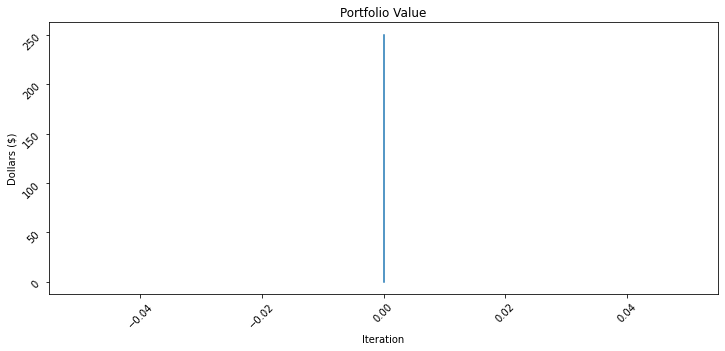

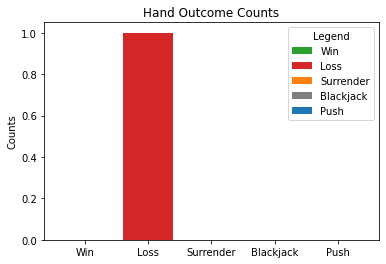

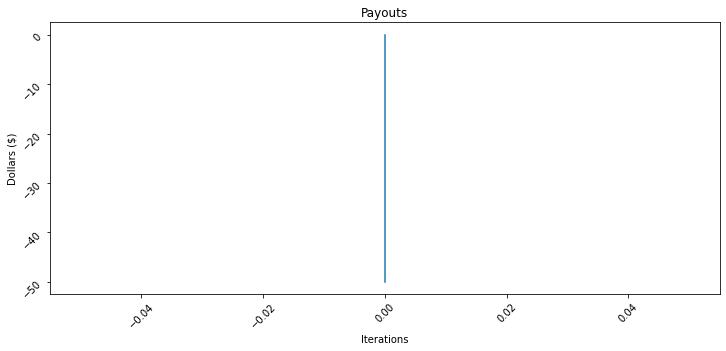

Expected Payout: -25.0
Max Drawdown: 0
Win/Loss Ratio: 0.0


In [100]:
'''INSTANTIATE CLASSES'''
deck1 = Dealer()
strategy = Strategy(-25, 1.2, 300, -12.5)
dealer = Dealer_strategy()
payout_calc = Payout()

'''GLOBAL VARIABLES'''
bet = -50
blackjack_payout_ratio = 1.5
portfolio = 300
surrender_loss = -25
portfolio_df = df = pd.DataFrame([{'Payout': 0, 'Portfolio_Value': 0, 'Win': 0, 'Loss': 0,
                                          'Surrender': 0, 'Blackjack': 0, 'Push': 0}])

'''LOAD STRATEGY'''
df = pd.read_csv('policy.csv')
df.columns = ['Index', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'A']    
df.set_index('Index', inplace=True, drop=True)

'''CREATE DECK'''   
mega_deck = []

for i in range(10):
    single_deck = deck1.create_single_deck()
    # print(single_deck)

    multi_deck = deck1.create_multi_deck(single_deck)
    # print(multi_deck)

    shuffle = deck1.shuffle_deck(multi_deck)
    # print(shuffle)

    cut_deck = deck1.cut_deck(multi_deck)

    for i in cut_deck:
        mega_deck.append(i)

    print(f'first 20 cards in deck: {mega_deck[:20]}')

'''RUN MONTE CARLO SIMULATION'''
for monte_carlo_index, i in enumerate(range(1)):

    '''DEAL CARDS'''
    player_hand = []
    dealer_hand = []

    # add cards to empty hand lists
    player_hand = deck1.deal_card(mega_deck, player_hand)
    dealer_hand = deck1.deal_card(mega_deck, dealer_hand)
    player_hand = deck1.deal_card(mega_deck, player_hand)
    dealer_hand = deck1.deal_card(mega_deck, dealer_hand)

    # create dictionary for player hand, decisions, and associated bet
    hand_and_strategy_dict = {}
    hand_and_strategy_dict['player hand'] = player_hand
    decision = strategy.get_strategy_decision(player_hand, dealer_hand, df)
    hand_and_strategy_dict['decision'] = decision
    hand_and_strategy_dict['bet'] = bet

    # create list for all player hands and decisions dictionaries (in case of split)
    player_hands_list = []
    player_hands_list.append(hand_and_strategy_dict)
    
    print(f'dealer hand: {dealer_hand}')
    print(f'player hand dict: {player_hands_list}')
    print(f'first 20 cards in deck: {mega_deck[:20]}')

    '''RUN STRATEGY'''

    # check for surrender
    if player_hands_list[0]['decision'] == 'SU':
        player_hands_list[0]['bet'] = surrender_loss
        print(f'surrender: {player_hands_list}')

    # for each player hand and decision (enumerate is for indexing)
    for index, player_dict in enumerate(player_hands_list):

        # decision iteration
        decision = player_dict['decision']
        print(f'decision iteration: {decision}')
            
        # while EACH decision is not stand or surrender
        while decision != 'S' and decision != 'SU' and decision != 'Bust':

            # split
            if decision == 'P':
                
                # player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                        
                # split player hands in 2 lists
                split_hand_1 = []
                split_hand_1.append(player_hand_iteration[0])
                split_hand_2 = []
                split_hand_2.append(player_hand_iteration[-1])

                # automatically hit each split
                strategy.hit(mega_deck, split_hand_1)
                strategy.hit(mega_deck, split_hand_2)
                print(f'new hands: {split_hand_1, split_hand_2}')

                # get decision for each split
                decision_1 = strategy.get_strategy_decision(split_hand_1, dealer_hand, df)
                decision_2 = strategy.get_strategy_decision(split_hand_2, dealer_hand, df)
                print(f'new decisions: {decision_1, decision_2}')

                # with an ace split, you are only dealt 1 card
                if player_hand_iteration == ['A', 'A']:
                    decision_1 = 'S'
                    decision_2 = 'S'

                # change original hand to null so we can delete it after the loop (in order to not disrupt the loop iteration)
                player_hands_list[index]['decision'] = None

                # add new hands and decisions to player_hands_list
                new_hand_dict_1 = {}
                new_hand_dict_2 = {}

                new_hand_dict_1['player hand'] = split_hand_1
                new_hand_dict_2['player hand'] = split_hand_2

                new_hand_dict_1['decision'] = decision_1
                new_hand_dict_2['decision'] = decision_2

                player_hands_list.append(new_hand_dict_1)
                player_hands_list.append(new_hand_dict_2)
                print(player_hands_list)

                break

            if decision == 'H':

                # get player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                # hit hand iteration
                strategy.hit(mega_deck, player_hand_iteration)
                # get decision
                decision = strategy.get_strategy_decision(player_hand_iteration, dealer_cards, df)
                # update player hand and decision
                player_dict['player hand'] = player_hand_iteration
                player_dict['decision'] = decision

                print(f'player dict: {player_dict}')

            # cannot surrender after hit
            if decision == 'SU':
                
                # if decision is surrender after a hit, you stand instead
                decision = 'S'
                break

            # bust
            # if decision == 'Bust':
            #     break

            if decision == 'D':
                
                # get player hand for this iteration
                player_hand_iteration = player_dict['player hand']
                # hit hand iteration
                strategy.hit(mega_deck, player_hand_iteration)
                # double bet
                player_dict['bet'] = player_dict['bet'] * 2
                # update player hand and decision
                player_dict['player hand'] = player_hand_iteration
                player_dict['decision'] = 'S'
                break
    
    '''CHECK FOR SURRENDER'''
    if player_hands_list[0]['decision'] == 'SU':
        payout = player_hands_list[0]['bet']
        print('surrender')
        portfolio += payout
        print(f'portfolio: {portfolio}')
        print(f'payout: {payout}')

        temp = pd.DataFrame([[payout, portfolio, 0, 0, 1, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
        portfolio_df = portfolio_df.append(temp)
        # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
        #                      'Loss': 0, 'Surrender': 1 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)
        continue

    '''RUN DEALER STRATEGY'''
    dealer_cards = dealer.dealer_strategy(mega_deck, dealer_hand)
    print(f'dealer cards: {dealer_hand}')

    '''CHECK FOR BLACKJACK'''
    # we only need the first hand to verify if there was a blackjack, so we will not loop through all hands
    # check if first hand decision is None type - if so, there was a split, and you cannot have a blackjack
    if player_hands_list[0]['player hand'] == None:
        print('cannot have blackjack after split')
        # break
        
    else:
        # check if player or dealer have blackjack
        blackjack_player = payout_calc.blackjack_value(player_hands_list[0]['player hand'])
        blackjack_dealer = payout_calc.blackjack_value(dealer_hand)
        
        print(f' blackjack player: {blackjack_player}')
        print(f' blackjack dealer: {blackjack_dealer}')

        blackjack_payout_value = payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio)

        print(f'blackjack payout value: {blackjack_payout_value}')

        # no blacjack -> do nothing
        if blackjack_payout_value == None:
            pass
        
        # calc payout if blackjack
        else:
            payout = blackjack_payout_value
            portfolio += blackjack_payout_value
            print('blackjack')
            print(payout)
            print(portfolio)
            if payout == 0:
                temp = pd.DataFrame([[payout, portfolio, 0, 0, 0, 0, 1]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
                #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 1}, ignore_index=True)
            if payout > 0:
                temp = pd.DataFrame([[payout, portfolio, 1, 0, 0, 1, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 1,
                #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 1, 'Push': 0}, ignore_index=True)
            if payout < 0:
                temp = pd.DataFrame([[payout, portfolio, 0, 1, 0, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
                portfolio_df = portfolio_df.append(temp)
                # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
                #                     'Loss': 1, 'Surrender': 0 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)

            # go to next simulation iteration
            continue

    '''GET PAYOUT'''
    # loop through each player hand
    for dict in player_hands_list:

        # get player hand for this iteration
        player_hand_iteration = dict['player hand']
        
        # get hand score
        player_score = payout_calc.card_score(player_hand_iteration)
        dealer_score = payout_calc.card_score(dealer_hand)
        print(f'player score: {player_score}')
        print(f'dealer score: {dealer_score}')

        # check for bust
        player_bust = payout_calc.bust(player_score)
        dealer_bust = payout_calc.bust(dealer_score)
        print(f'player bust: {player_bust}')
        print(f'dealer bust: {dealer_bust}')

        # compare scores
        payout = payout_calc.win_loss(player_score, dealer_score, player_bust, dealer_bust, bet)
        print(payout)
        
        portfolio += payout
        print(portfolio)

        if payout == 0:
            temp = pd.DataFrame([[payout, portfolio, 0, 0, 0, 0, 1]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)
            # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
            #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 1}, ignore_index=True)
        if payout > 0:
            temp = pd.DataFrame([[payout, portfolio, 0, 0, 1, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)
            # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 1,
            #                     'Loss': 0, 'Surrender': 0 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)
        if payout < 0:
            temp = pd.DataFrame([[payout, portfolio, 0, 1, 0, 0, 0]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
            portfolio_df = portfolio_df.append(temp)
            # portfolio_df.append({'Payout': payout, 'Portfolio_Value': portfolio, 'Win': 0,
                                # 'Loss': 1, 'Surrender': 0 ,'Blackjack': 0, 'Push': 0}, ignore_index=True)

portfolio_df.head()

'''GENERATE GRAPHS'''
# portfolio value
plt.figure(figsize=(12,5))
plt.plot(portfolio_df['Portfolio_Value'])
plt.title('Portfolio Value')
plt.xlabel('Iteration')
plt.ylabel('Dollars ($)')
plt.tick_params(rotation=45)
plt.show()

# hand outcomes
# fig, ax = plt.subplots()

# bar_labels = ['Win', 'Loss', 'Surrender', 'Blackjack', 'Push']

# win = portfolio_df['Win'].sum()
# loss = portfolio_df['Loss'].sum()
# surrender = portfolio_df['Surrender'].sum()
# blackjack = portfolio_df['Blackjack'].sum()
# push = portfolio_df['Push'].sum()
# counts = [win, loss, surrender, blackjack, push]
# bar_colors = ['tab:green', 'tab:red', 'tab:yellow', 'tab:black', 'tab:blue']

# ax.bar(bar_labels, counts, label=bar_labels, color=bar_colors)
# ax.set_ylabel('fruit supply')
# ax.set_title('Fruit supply by kind and color')
# ax.legend(title='Fruit color')
# plt.show()

fig, ax = plt.subplots()

data_name = ['Win', 'Loss', 'Surrender', 'Blackjack', 'Push']
win = portfolio_df['Win'].sum()
loss = portfolio_df['Loss'].sum()
surrender = portfolio_df['Surrender'].sum()
blackjack = portfolio_df['Blackjack'].sum()
push = portfolio_df['Push'].sum()
counts = [win, loss, surrender, blackjack, push]
data_label = ['Win', 'Loss', 'Surrender', 'Blackjack', 'Push']
bar_colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:gray', 'tab:blue']

ax.set_facecolor('white')
ax.bar(data_name, counts, label=data_label, color=bar_colors)

ax.set_ylabel('Counts')
ax.set_title('Hand Outcome Counts')
ax.legend(title='Legend')

plt.show()

# payouts
plt.figure(figsize=(12,5))
plt.plot(portfolio_df['Payout'])
plt.title('Payouts')
plt.xlabel('Iterations')
plt.ylabel('Dollars ($)')
plt.tick_params(rotation=45)
plt.show()

'''SUMMARY STATISTICS'''
# expected payout
expected_payout = portfolio_df['Payout'].mean()
print(f'Expected Payout: {expected_payout}')

# max drawdown
max_drawdown = portfolio_df['Portfolio_Value'].min()
print(f'Max Drawdown: {max_drawdown}')

# win/loss ratio
win_loss_ratio = portfolio_df['Win'].sum() / portfolio_df['Loss'].sum()
print(f'Win/Loss Ratio: {win_loss_ratio}')


to do
- monte carlo only runs onces
- delete empty 1st row of df
- random None type keyerror from get_strategy_decision
- organize code and file

In [98]:
portfolio_df = portfolio_df.drop(0)
portfolio_df.head()

,Payout,Portfolio_Value,Win,Loss,Surrender,Blackjack,Push


new payout function

/ blackjack
for i in player_hands_dict:
    if player_hands_dict[0]['player hand'] == None:
        break
    else:
        do blackjack calc

for i in player_hands_dict:
    check for bust
    check for double
    compare to dealer

## Build Split

In [90]:
temp = pd.DataFrame([[payout, portfolio, 0, 0, 0, 0, 1]],
                                columns=['Payout', 'Portfolio_Value', 'Win', 'Loss', 'Surrender', 'Blackjack', 'Push'],
                                index=[monte_carlo_index])
temp.head()

,Payout,Portfolio_Value,Win,Loss,Surrender,Blackjack,Push
0,0,300,0,0,0,0,1


In [26]:
deck1 = Dealer()
strategy = Strategy(-25, 1.2, 300, -12.5)
dealer = Dealer_strategy()
payout_calc = Payout()

mega_deck = [2, 'A', 5, 7, 10, 4, 5, 6, 7]
player_hand = [2, 2]
dealer_hand = [5, 4]

# create list of dictionaries for each player hand and associated strategy decision
hand_and_strategy_dict = {}
hand_and_strategy_dict['player hand'] = player_hand

decision = strategy.get_strategy_decision(player_hand, dealer_hand, df)
hand_and_strategy_dict['decision'] = decision

player_hands_list = []
player_hands_list.append(hand_and_strategy_dict)
print(dealer_hand)
print(player_hands_list)

process = True
restart = False

# # create 2 while loops - we want to restart the for loop whenever we have a split
# while process == True:

#     restart = False

#     # we will restart here with the new player_hands_list variable
#     while restart == False:

#         player_hands_list = player_hands_list
#         index = 0

        # loop through all hands and associated decisions - players can have multiple hands if the cards are split
for index, player_dict in enumerate(player_hands_list):

    print(index)

    print('for loop')
    print(player_hands_list)
    print(decision)

    # decision iteration
    decision = player_dict['decision']
    print(decision)
            
    # while EACH decision is not stand or surrender
    while decision != 'S' and decision != 'SU':

        print('while loop')

        # split
        if decision == 'P':

            # player hand for this iteration
            player_hand_iteration = player_dict['player hand']
                    
            # split player hands in 2 lists
            split_hand_1 = []
            split_hand_1.append(player_hand_iteration[0])
            split_hand_2 = []
            split_hand_2.append(player_hand_iteration[-1])

            # automatically hit each split
            strategy.hit(mega_deck, split_hand_1)
            strategy.hit(mega_deck, split_hand_2)
            print(f'new hands: {split_hand_1, split_hand_2}')

            # get decision for each split
            decision_1 = strategy.get_strategy_decision(split_hand_1, dealer_hand, df)
            decision_2 = strategy.get_strategy_decision(split_hand_2, dealer_hand, df)
            print(f'new decisions: {decision_1, decision_2}')

            # with an ace split, you are only dealt 1 card
            if player_hand_iteration == ['A', 'A']:
                decision_1 = 'S'
                decision_2 = 'S'

            # change original hand to null so we can delete it after the loop (in order to not disrupt the loop iteration)
            player_hands_list[index]['decision'] = None

            # add new hands and decisions to player_hands_list
            new_hand_dict_1 = {}
            new_hand_dict_2 = {}

            new_hand_dict_1['player hand'] = split_hand_1
            new_hand_dict_2['player hand'] = split_hand_2

            new_hand_dict_1['decision'] = decision_1
            new_hand_dict_2['decision'] = decision_2

            player_hands_list.append(new_hand_dict_1)
            player_hands_list.append(new_hand_dict_2)
            print(player_hands_list)

            break

        if decision == 'D':
            print('double')

        if decision == 'H':
            print('hit')



'''
TO DO
- BLACKJACK PAYOUT DOES NOT COUNT FOR SPLIT - WE CAN JUST CHECK LENGTH OF DICTIONARY
- CHANGE ALL SIMULATION FUNCTIONS TO WORK WITH A DICTIONARY OF CARDS
- GRAPHS / STORE DATA
'''


[5, 4]
[{'player hand': [2, 2], 'decision': 'P'}]
0
for loop
[{'player hand': [2, 2], 'decision': 'P'}]
P
P
while loop
split function
new hands: ([2, 2], [2, 'A'])
new decisions: ('P', 'D')
[{'player hand': [2, 2], 'decision': None}, {'player hand': [2, 2], 'decision': 'P'}, {'player hand': [2, 'A'], 'decision': 'D'}]
1
for loop
[{'player hand': [2, 2], 'decision': None}, {'player hand': [2, 2], 'decision': 'P'}, {'player hand': [2, 'A'], 'decision': 'D'}]
P
P
while loop
split function
new hands: ([2, 5], [2, 7])
new decisions: ('H', 'D')
[{'player hand': [2, 2], 'decision': None}, {'player hand': [2, 2], 'decision': None}, {'player hand': [2, 'A'], 'decision': 'D'}, {'player hand': [2, 5], 'decision': 'H'}, {'player hand': [2, 7], 'decision': 'D'}]
2
for loop
[{'player hand': [2, 2], 'decision': None}, {'player hand': [2, 2], 'decision': None}, {'player hand': [2, 'A'], 'decision': 'D'}, {'player hand': [2, 5], 'decision': 'H'}, {'player hand': [2, 7], 'decision': 'D'}]
P
D
while loop

KeyboardInterrupt: 

### build blackjack payout

In [64]:
for i in range(1):
    player_hands_list = [{'player hand': ['A', 10], 'decision': 'S', 'bet': -50}]
    dealer_hand = ['A', 10]
    print(dealer_cards)
    print(player_hands_list)
    if player_hands_list[0]['player hand'] == None:
        print('cannot have blackjack after split')
        # break
        
    else:
        # check if player or dealer have blackjack
        blackjack_player = payout_calc.blackjack_value(player_hands_list[0]['player hand'])
        blackjack_dealer = payout_calc.blackjack_value(dealer_hand)

        print(f'player bj {blackjack_player}')
        print(f'dealer bj {blackjack_dealer}')
            
        blackjack_payout_value = payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio)

        print(f'bj payout {blackjack_payout_value}')

        # no blacjack -> do nothing
        if blackjack_payout_value == False:
            pass

        else:
            payout = blackjack_payout_value
            portfolio += blackjack_payout_value
            print('blackjack')
            print(payout)
            print(portfolio)
            continue

['A', 10]
[{'player hand': ['A', 10], 'decision': 'S', 'bet': -50}]
21
21
player bj True
dealer bj True
bj payout 0


In [128]:
import time

list = [1, 2]

for i in list:
    while i == 1:
        if i == 1:
            print(i)
            list = [2, 3]
            time.sleep(1)


SyntaxError: 'return' outside function (Temp/ipykernel_29524/3101531143.py, line 11)

In [88]:
# deck1 = Dealer()
# strategy = Strategy(-25, 1.2, 300, -12.5)
# dealer = Dealer_strategy()
# payout_calc = Payout()

# player_hand = [6, 6]
# dealer_hand = [5, 4]

# # create list of dictionaries for each player hand and associated strategy decision
# hand_and_strategy_dict = {}
# hand_and_strategy_dict['player hand'] = player_hand

# decision = strategy.get_strategy_decision(player_hand, dealer_hand, df)
# hand_and_strategy_dict['decision'] = decision

# player_hands_list = []
# player_hands_list.append(hand_and_strategy_dict)


# #####################################
# player_hand = []
# player_hand.append(player_cards)
# print(player_hand)

# length = len(player_hand)

# for hand in player_hand:
#     # for i in range(length):

#     for card in hand:
#         print(card)

# dealer_cards = [5, 4]

# decision = strategy.get_strategy_decision(player_cards, dealer_cards, df)

# # temporary value for loop
# decision_list = [1]

# for i in player_hand:

#     for i in decision_list:

#         while decision != 'S' and decision != 'SU':

#         # for i in decision_list:

#             if decision == 'P':

#                 player_hand_1 = []
#                 player_hand_1.append(player_hand[0][0])
#                 print(f' player deck {player_hand}')
#                 player_hand_2 = []
#                 player_hand_2.append(player_hand[0][1])
#                 # this goes first before adding cards to each hand
#                 # cards_to_remove = []
#                 # for card in player_hand_1:
#                 #     cards_to_remove.append(card)
#                 # for card in player_hand_1:
#                 #     cards_to_remove.append(card)
#                 # print(f' cards remove {cards_to_remove}')

#                 strategy.hit(mega_deck, player_hand_1)
#                 strategy.hit(mega_deck, player_hand_2)

#                 print(f' player hand 1 {player_hand_1}')
#                 print(f' player hand 2 {player_hand_2}')

#                 del player_hand[0]
#                 # player_deck.remove(cards_to_remove)
#                 player_hand.append(player_hand_1)
#                 player_hand.append(player_hand_2)
#                 print(player_hand)
#                 print('done')


#             # del decision_list[0]
#             # for hand in player_deck:

#             #     decision_temp = strategy.get_strategy_decision(player_cards, dealer_cards, df)
#             #     print(decision_temp)
#             #     decision_list.append(decision_temp)
#             #     print(decision_list)


#     # you cant split ace again, but you can everything else

#     # split
#         # print('split')

[[6, 6]]
6
6
 player deck [[6, 6]]
 player hand 1 [6]
 player hand 2 [6]
[[6], [6]]
done
P
['P']
P
['P', 'P']
 player deck [[6], [6]]


IndexError: list index out of range

to do
- make sure simulation works
- split
    - create a list called player_deck full of each player card set
    - put everything within a for loop to loop through player deck
- store payout and portfolio to df and plot df at the end

In [79]:
print(payout_calc.blackjack_value(player_cards))


True


In [85]:
blackjack_payout_ratio = 1.5
print(blackjack_player)
print(blackjack_dealer)
print(payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio))

True
None
False


In [86]:
blackjack_dealer = payout_calc.blackjack_value(dealer_cards)
print(blackjack_dealer)
print(payout_calc.blackjack_payout_function(blackjack_player, blackjack_dealer, bet, blackjack_payout_ratio))

False
75.0
